# La Liga
## Resultados de fútbol de La Liga española entre las temporadas 1995-96 y 2020-21

Este conjunto de datos contiene los resultados de los partidos de La Liga, incluidos los resultados en el descanso.

Las columnas incluyen Season (Temporada), HomeTeam (Equipo local), AwayTeam (Equipo visitante), FTHG (Goles equipo local en el tiempo completo), FTAG (Goles equipo visitante en el tiempo completo), FTR (Resultado en tiempo completo), HTHG (Goles equipo local en el medio tiempo), HTAG (Goles equipo visitante en el medio tiempo) y HTR (resultado en el medio tiempo).

Los resultados provienen de este [*sitio*](https://www.football-data.co.uk/spainm.php), un sitio de apuestas de fútbol del Reino Unido. Tienen conjuntos de datos para cada temporada individual, pero se han combinado en un solo conjunto para facilitar su uso.

Última actualización 15/06/2021.

Los datos globales se pueden descargar de la página de [*Kaggle*](https://www.kaggle.com/datasets/kishan305/la-liga-results-19952020).

Nuestro proyecto lo vamos a dividir de la siguiente forma:

1. Importación de las librerías de Python que vamos a utilizar
2. Importación de los datos que vamos a utilizar dentro de nuestro análisis
3. Exploración de los datos importados
4. Limpieza de los datos importados
5. Preprocesamiento de los datos
6. Estudio de la variable objetivo
7. Aplicación de los algoritmos de *Machine Learning*
8. Realización de las predicciones correspondientes

El estudio está basado en esta [*página*](https://www.kaggle.com/code/nikhileshbasil/laliga-nb).


### 1. Importación de las librerías de Python que vamos a utilizar

In [1]:
# Importamos las librerías que vamos a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Importación de los datos que vamos a utilizar dentro de nuestro análisis

In [4]:
# Importamos los datos del archivo .csv
datos = pd.read_csv('./LaLiga_Matches_1995-2021.csv')

In [5]:
datos

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
10039,2020-21,22/05/2021,Osasuna,Sociedad,0,1,A,0.0,0.0,D
10040,2020-21,22/05/2021,Real Madrid,Villarreal,2,1,H,0.0,1.0,A
10041,2020-21,22/05/2021,Valladolid,Ath Madrid,1,2,A,1.0,0.0,H
10042,2020-21,23/05/2021,Granada,Getafe,0,0,D,0.0,0.0,D


### 3. Exploración de los datos importados

In [6]:
# Columnas de los datos
datos.columns

Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR'],
      dtype='object')

In [7]:
# Tamaño de los datos
datos.shape

(10044, 10)

In [8]:
# Vemos los valores NO nulos de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10044 non-null  object 
 1   Date      10044 non-null  object 
 2   HomeTeam  10044 non-null  object 
 3   AwayTeam  10044 non-null  object 
 4   FTHG      10044 non-null  int64  
 5   FTAG      10044 non-null  int64  
 6   FTR       10044 non-null  object 
 7   HTHG      10042 non-null  float64
 8   HTAG      10042 non-null  float64
 9   HTR       10042 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 784.8+ KB


In [9]:
# Comprobamos los datos faltantes:
datos.isna().sum()

Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        2
HTAG        2
HTR         2
dtype: int64

In [10]:
# Distribución de las variables numéricas
datos.describe()

,FTHG,FTAG,HTHG,HTAG
count,10044.000000,10044.000000,10042.000000,10042.000000
mean,1.561928,1.118877,0.690799,0.485859
std,1.307706,1.116444,0.841658,0.698890
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000
max,10.000000,8.000000,6.000000,6.000000


In [11]:
# Comportamiento de las variables categóricas
datos.describe(include=['O'])

,Season,Date,HomeTeam,AwayTeam,FTR,HTR
count,10044,10044,10044,10044,10044,10042
unique,26,2636,48,48,3,3
top,1995-96,31/03/1996,Ath Bilbao,Valencia,H,D
freq,462,11,498,498,4772,4254


Podemos seleccionar solo los datos de una temporada

In [12]:
Temporada = datos.loc[datos['Season'] == '2020-21']
Temporada

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
9664,2020-21,12/9/2020,Eibar,Celta,0,0,D,0.0,0.0,D
9665,2020-21,12/9/2020,Granada,Ath Bilbao,2,0,H,0.0,0.0,D
9666,2020-21,12/9/2020,Cadiz,Osasuna,0,2,A,0.0,1.0,A
9667,2020-21,13/09/2020,Alaves,Betis,0,1,A,0.0,0.0,D
9668,2020-21,13/09/2020,Valladolid,Sociedad,1,1,D,1.0,0.0,H
...,...,...,...,...,...,...,...,...,...,...
10039,2020-21,22/05/2021,Osasuna,Sociedad,0,1,A,0.0,0.0,D
10040,2020-21,22/05/2021,Real Madrid,Villarreal,2,1,H,0.0,1.0,A
10041,2020-21,22/05/2021,Valladolid,Ath Madrid,1,2,A,1.0,0.0,H
10042,2020-21,23/05/2021,Granada,Getafe,0,0,D,0.0,0.0,D


### 4. Limpieza de los datos importados

Para abordar la limpieza de datos, en primer lugar copiaremos los datos en nuevas variables. Así, siempre podremos recurrir a los datos originales.

In [62]:
datos_c = datos.copy()

In [63]:
datos_c

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
10039,2020-21,22/05/2021,Osasuna,Sociedad,0,1,A,0.0,0.0,D
10040,2020-21,22/05/2021,Real Madrid,Villarreal,2,1,H,0.0,1.0,A
10041,2020-21,22/05/2021,Valladolid,Ath Madrid,1,2,A,1.0,0.0,H
10042,2020-21,23/05/2021,Granada,Getafe,0,0,D,0.0,0.0,D


Vemos las columnas con datos faltantes:

In [73]:
# Verificamos los datos faltantes de los dataset
print('Datos faltantes:')
datos_c.isna().sum()

Datos faltantes:


Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        1
HTAG        1
HTR         1
dtype: int64

Vamos a revisar esos 2 datos faltantes, para ver si los podemos obtener de algún otro lugar:

In [72]:
# Revisamos los datos faltantes
datos_c[datos_c['HTR'].isna()][['HTHG', 'HTAG', 'HTR']]

,HTHG,HTAG,HTR
1472,NaN,NaN,NaN


In [79]:
# Vemos esos datos
datos_c.loc[136]

Season         1995-96
Date        19/11/1995
HomeTeam    Ath Bilbao
AwayTeam     La Coruna
FTHG                 1
FTAG                 0
FTR                  H
HTHG                 0
HTAG                 0
HTR                  D
Name: 136, dtype: object

Vemos que en esta [*página*](https://www.resultados-futbol.com/partido/Athletic-Bilbao/Deportivo/1996) aparece esto:
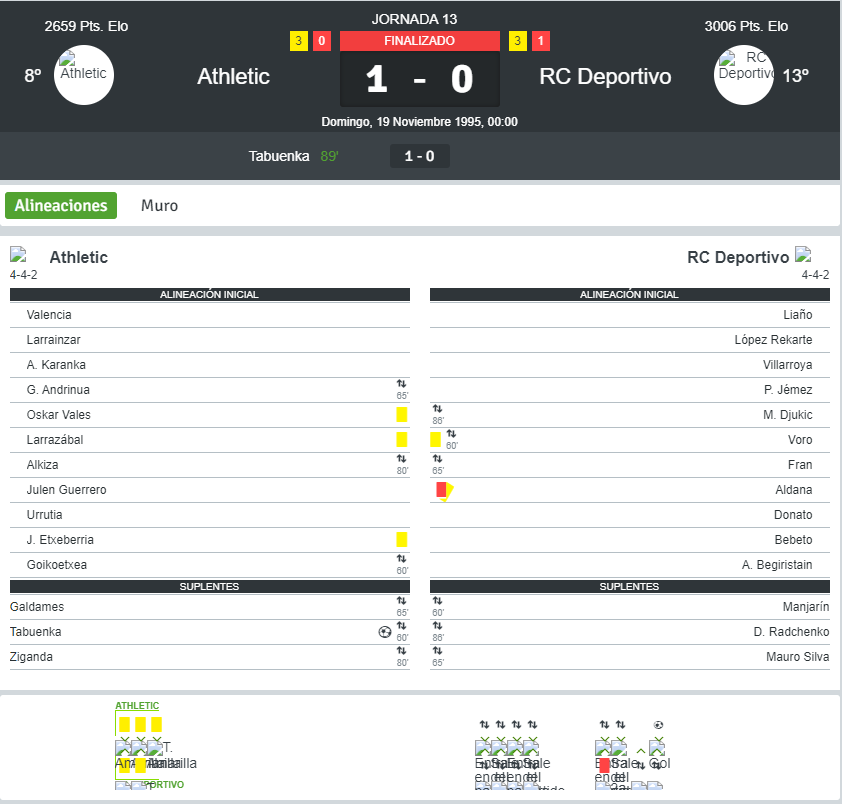

Por tanto, dado que el gol se marcó en el minuto 60, habrá que poner los datos 0, 0 y 'D' en los 3 campos sin datos:


In [70]:
datos_c.loc[136,'HTHG'] = 0
datos_c.loc[136,'HTAG'] = 0
datos_c.loc[136,'HTR'] = 'D'
datos_c.loc[136]

Season         1995-96
Date        19/11/1995
HomeTeam    Ath Bilbao
AwayTeam     La Coruna
FTHG                 1
FTAG                 0
FTR                  H
HTHG                 0
HTAG                 0
HTR                  D
Name: 136, dtype: object

In [80]:
datos_c.loc[136][['HTHG', 'HTAG', 'HTR']]

HTHG    0
HTAG    0
HTR     D
Name: 136, dtype: object

In [81]:
datos_c.loc[1472]

Season         1998-99
Date         10/1/1999
HomeTeam    Valladolid
AwayTeam         Betis
FTHG                 0
FTAG                 3
FTR                  A
HTHG               NaN
HTAG               NaN
HTR                NaN
Name: 1472, dtype: object

Por tanto, dado que el gol se marcó en el minuto 60, habrá que poner los datos 0, 0 y 'D' en los 3 campos sin datos:

In [83]:
#datos_c.loc[1472,'HTHG'] = 0
#datos_c.loc[1472,'HTAG'] = 0
#datos_c.loc[1472,'HTR'] = 'D'
datos_c.loc[1472]

Season         1998-99
Date         10/1/1999
HomeTeam    Valladolid
AwayTeam         Betis
FTHG                 0
FTAG                 3
FTR                  A
HTHG               NaN
HTAG               NaN
HTR                NaN
Name: 1472, dtype: object

In [82]:
datos_c.loc[1472][['HTHG', 'HTAG', 'HTR']]

HTHG    NaN
HTAG    NaN
HTR     NaN
Name: 1472, dtype: object

### 5. Preprocesamiento de los datos

Renombramos las columnas:

In [15]:
datos_c.rename(columns={"dt":"Fecha",
                        "AverageTemperature":"TemperaturaMedia",
                        "AverageTemperatureUncertainty":"TemperaturaMediaIncertidumbre",
                        "Country":"País"}, 
               inplace=True)
datos_c

,Fecha,TemperaturaMedia,TemperaturaMediaIncertidumbre,País
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


Creamos un índice con las Fechas:

In [16]:
datos_c["Fecha"] = pd.to_datetime(datos_c["Fecha"])
datos_c.set_index("Fecha", inplace=True)
datos_c.index

DatetimeIndex(['1743-11-01', '1744-04-01', '1744-05-01', '1744-06-01',
               '1744-07-01', '1744-09-01', '1744-10-01', '1744-11-01',
               '1744-12-01', '1745-01-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Fecha', length=544811, freq=None)

Creamos las columnsa Año y Mes a partir de los índices de Fecha:

In [17]:
datos_c["Año"] = datos_c.index.year
datos_c["Mes"] = datos_c.index.month
datos_c

,TemperaturaMedia,TemperaturaMediaIncertidumbre,País,Año,Mes
Fecha,,,,,
1743-11-01,4.384,2.294,Åland,1743,11
1744-04-01,1.530,4.680,Åland,1744,4
1744-05-01,6.702,1.789,Åland,1744,5
1744-06-01,11.609,1.577,Åland,1744,6
1744-07-01,15.342,1.410,Åland,1744,7
...,...,...,...,...,...
2013-04-01,21.142,0.495,Zimbabwe,2013,4
2013-05-01,19.059,1.022,Zimbabwe,2013,5
2013-06-01,17.613,0.473,Zimbabwe,2013,6


Nos quedamos con los datos desde 1950.

In [26]:
df = datos_c.loc["1950":]
df

,TemperaturaMedia,TemperaturaMediaIncertidumbre,País,Año,Mes
Fecha,,,,,
1950-01-01,-5.611,0.816,Åland,1950,1
1950-02-01,-1.804,0.305,Åland,1950,2
1950-03-01,0.090,0.439,Åland,1950,3
1950-04-01,3.630,0.342,Åland,1950,4
1950-05-01,8.106,0.239,Åland,1950,5
...,...,...,...,...,...
2013-04-01,21.142,0.495,Zimbabwe,2013,4
2013-05-01,19.059,1.022,Zimbabwe,2013,5
2013-06-01,17.613,0.473,Zimbabwe,2013,6


Posteriormente vamos a entender los datos que vamos a estar manejando, para ello verificamos la cantidad de datos con que contamos, el tipo de datos y, por último, las estadísticas del mismo.

In [27]:
# Verificamos la cantidad de datos
print('Cantidad de datos:')
df.shape

Cantidad de datos:


(184907, 5)

In [28]:
# Verifico el tipo de datos
print('Tipos de datos:')
df.info()

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184907 entries, 1950-01-01 to 2013-08-01
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TemperaturaMedia               184907 non-null  float64
 1   TemperaturaMediaIncertidumbre  184907 non-null  float64
 2   País                           184907 non-null  object 
 3   Año                            184907 non-null  int64  
 4   Mes                            184907 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 8.5+ MB


In [29]:
# Verificamos las estadísticas
print('Estadísticas del dataset:')
df.describe()

Estadísticas del dataset:


,TemperaturaMedia,TemperaturaMediaIncertidumbre,Año,Mes
count,184907.000000,184907.000000,184907.000000,184907.000000
mean,18.996682,0.356046,1981.339014,6.479403
std,10.506719,0.227611,18.381642,3.447832
min,-36.332000,0.052000,1950.000000,1.000000
25%,13.225000,0.226000,1965.000000,3.000000
50%,23.384000,0.300000,1981.000000,6.000000
75%,26.562000,0.412000,1997.000000,9.000000
max,38.842000,5.936000,2013.000000,12.000000


Agrupamos por países y vemos sus temperaturas medias, ordenándolas de menor a mayor:

In [30]:
df[["País", "TemperaturaMedia"]].groupby(["País"]).mean().sort_values("TemperaturaMedia")

,TemperaturaMedia
País,
Greenland,-18.089484
Denmark,-17.556696
Svalbard And Jan Mayen,-6.924414
Russia,-4.888503
Canada,-4.466149
...,...
Senegal,28.339955
Aruba,28.358814
Burkina Faso,28.436143


In [31]:
df

,TemperaturaMedia,TemperaturaMediaIncertidumbre,País,Año,Mes
Fecha,,,,,
1950-01-01,-5.611,0.816,Åland,1950,1
1950-02-01,-1.804,0.305,Åland,1950,2
1950-03-01,0.090,0.439,Åland,1950,3
1950-04-01,3.630,0.342,Åland,1950,4
1950-05-01,8.106,0.239,Åland,1950,5
...,...,...,...,...,...
2013-04-01,21.142,0.495,Zimbabwe,2013,4
2013-05-01,19.059,1.022,Zimbabwe,2013,5
2013-06-01,17.613,0.473,Zimbabwe,2013,6


KeyboardInterrupt: 

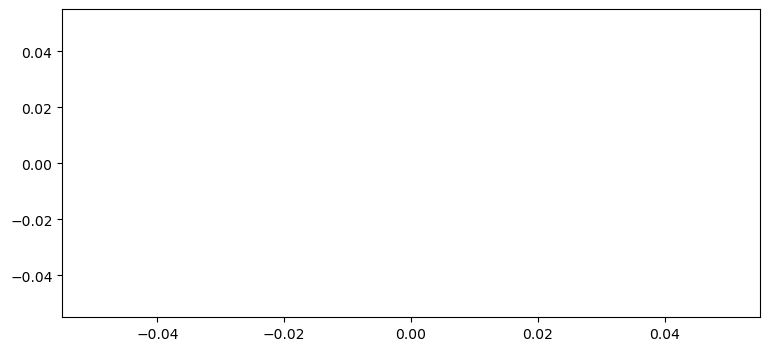

In [32]:
plt.figure(figsize=(9,4))
sns.lineplot(x="Año", y="TemperaturaMedia", data=df)
plt.show()
# Esto no sale. Tarda mucho tiempo

### 6. Caso particular de España:

In [33]:
Spain = df.loc[df['País'] == 'Spain']
Spain[["Año", "TemperaturaMedia"]].groupby(["Año"]).mean()

,TemperaturaMedia
Año,
1950,14.239250
1951,13.347083
1952,13.794667
1953,13.893250
1954,13.429667
...,...
2009,14.968083
2010,14.246000
2011,15.321083


España desde el año 1950:

In [39]:
Spain_50 = Spain.loc["1950":]
Spain_50

,TemperaturaMedia,TemperaturaMediaIncertidumbre,País,Año,Mes
Fecha,,,,,
1950-01-01,5.757,0.298,Spain,1950,1
1950-02-01,8.464,0.218,Spain,1950,2
1950-03-01,10.398,0.352,Spain,1950,3
1950-04-01,11.612,0.228,Spain,1950,4
1950-05-01,15.255,0.275,Spain,1950,5
...,...,...,...,...,...
2013-04-01,12.188,0.303,Spain,2013,4
2013-05-01,14.204,0.203,Spain,2013,5
2013-06-01,19.364,0.315,Spain,2013,6


##### Temperatura media en España desde el año 1950:

In [40]:
Spain_50[["Año", "TemperaturaMedia"]].groupby(["Año"]).mean()

,TemperaturaMedia
Año,
1950,14.239250
1951,13.347083
1952,13.794667
1953,13.893250
1954,13.429667
...,...
2009,14.968083
2010,14.246000
2011,15.321083


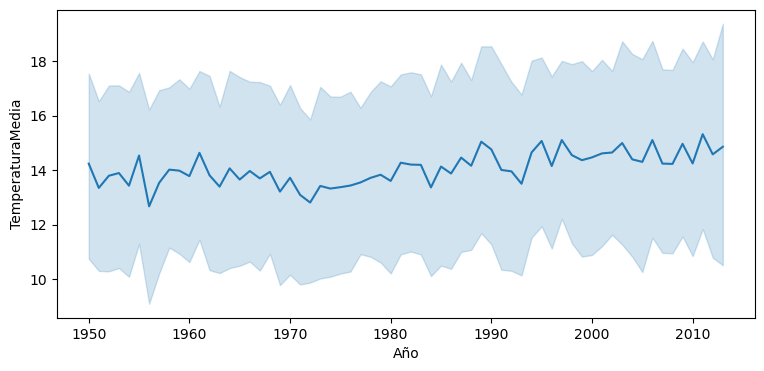

In [41]:
plt.figure(figsize=(9,4))
sns.lineplot(x="Año", y="TemperaturaMedia", data=Spain_50)
plt.show()

Temperatura media en España desde el año 1950 en el mes de Agosto:

In [42]:
Spain_50_08 = Spain_50.loc[Spain_00['Mes'] == 8]
Spain_50_08

,TemperaturaMedia,TemperaturaMediaIncertidumbre,País,Año,Mes
Fecha,,,,,
1950-08-01,22.657,0.198,Spain,1950,8
1951-08-01,21.392,0.162,Spain,1951,8
1952-08-01,22.046,0.246,Spain,1952,8
1953-08-01,23.665,0.184,Spain,1953,8
1954-08-01,21.089,0.232,Spain,1954,8
...,...,...,...,...,...
2009-08-01,24.571,0.336,Spain,2009,8
2010-08-01,24.315,0.304,Spain,2010,8
2011-08-01,24.115,0.225,Spain,2011,8


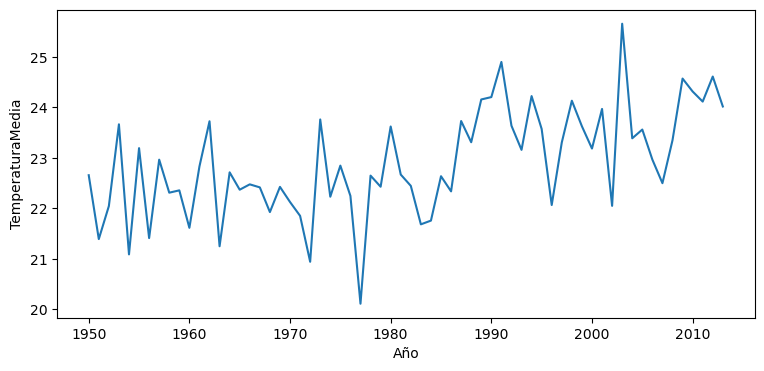

In [43]:
plt.figure(figsize=(9,4))
sns.lineplot(x="Año", y="TemperaturaMedia", data=Spain_50_08)
plt.show()

### 7. Series temporales

Una serie temporal es una serie de puntos de datos indexados (o listados o graficados) en orden de tiempo. Más comúnmente, una serie temporal es una secuencia tomada en puntos sucesivos igualmente espaciados en el tiempo. Es un método de conveniencia para conversión de frecuencia y remuestreo de series de tiempo.

Tomamos como referencia esta [página](https://quantspace.es/2020/08/01/analisis-de-series-temporales-con-python-parte-2/).

In [83]:
Spain_50_re = Spain_50[["TemperaturaMedia"]].resample("A").mean()
Spain_50_re

,TemperaturaMedia
Fecha,
1950-12-31,14.239250
1951-12-31,13.347083
1952-12-31,13.794667
1953-12-31,13.893250
1954-12-31,13.429667
...,...
2009-12-31,14.968083
2010-12-31,14.246000
2011-12-31,15.321083


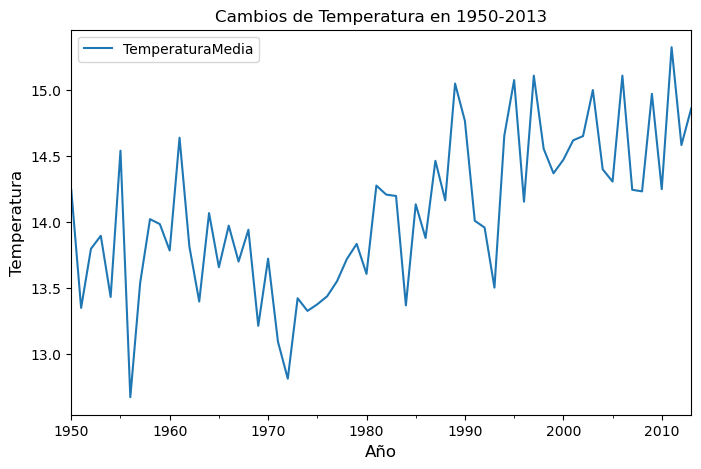

In [84]:
Spain_50_re.plot(title="Cambios de Temperatura en 1950-2013", figsize=(8,5))
plt.ylabel("Temperatura", fontsize=12)
plt.xlabel("Año", fontsize=12)
plt.legend()

In [95]:
# Impelementamos la librería de Dickey Fuller Avanzada
from statsmodels.tsa.stattools import adfuller

print("Resultados del Test de Dickey Fuller Avanzado (ADF):")

# adf = adfuller(Spain_50_re.iloc[:,0].values, autolag="AIC")

# Aplicamos el test a la TemepraturaMedia
adf = adfuller(Spain_50_re["TemperaturaMedia"])
adf_output = pd.Series(adf[0:4], index=["Valor del Test", "p-Valor", "Lags Usados", "Número de Observaciones Usadas"])
for key, value in adf[4].items():
    adf_output["Valor Crítico (%s)"%key] = value
print(adf_output)

Resultados del Test de Dickey Fuller Avanzado (ADF):
Valor del Test                    -1.526889
p-Valor                            0.520170
Lags Usados                        2.000000
Número de Observaciones Usadas    61.000000
Valor Crítico (1%)                -3.542413
Valor Crítico (5%)                -2.910236
Valor Crítico (10%)               -2.592745
dtype: float64


El Valor del Test es -1,53

Dado que en este caso el valor de la prueba (-1,53) es mayor que todos los valores críticos, entonces la hipótesis nula no puede ser rechazada, y por ello, concluimos que estamos ante una serie temporal NO estacionaria.

Aunque con una probabilidad del 52% de que nuestra serie temporal sea NO estacionaria (p-Valor).

In [104]:
decomp = seasonal_decompose(Spain_50_re)
# tendencia
trend = decomp.trend 
# ciclo
seasonal = decomp.seasonal
# residuo
residual = decomp.resid

#print(trend, seasonal, residual)
print(decomp)

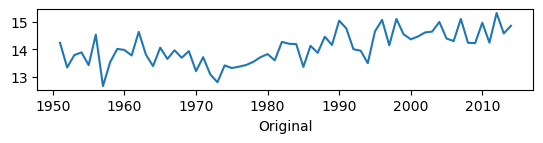

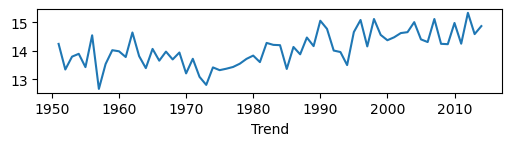

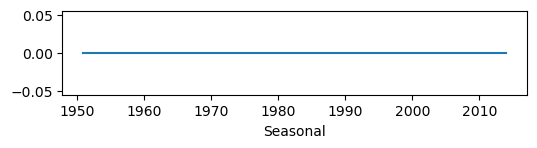

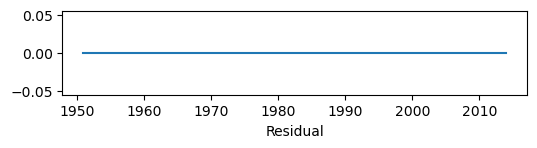

<Figure size 600x500 with 0 Axes>

In [53]:
plt.subplot(411)
plt.plot(Spain_50_re)
plt.xlabel("Original")
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel("Trend")
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel("Seasonal")
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel("Residual")
plt.figure(figsize=(6,5))

plt.tight_layout()

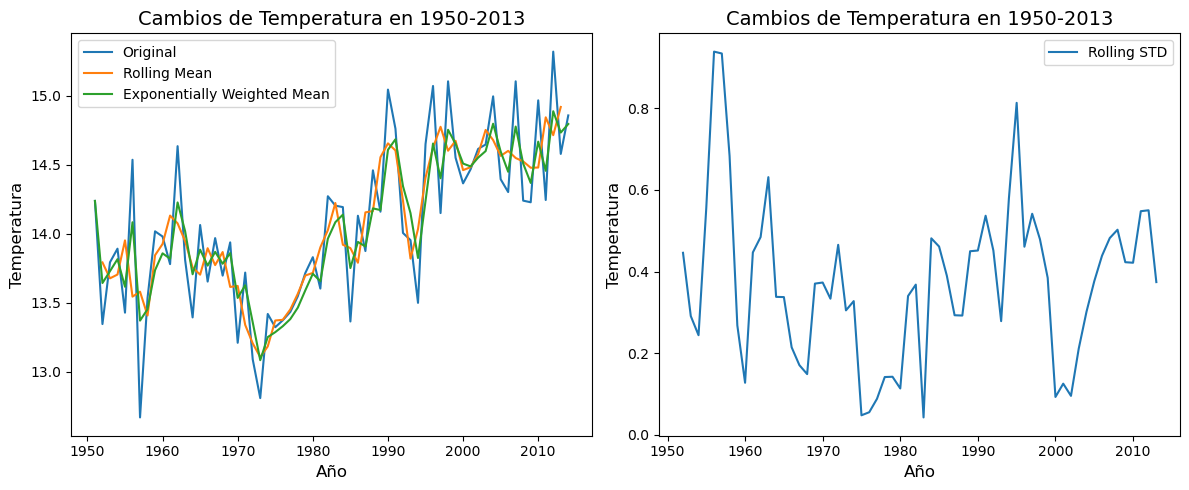

In [56]:
rol_mean = Spain_50_re.rolling(window=3, center=True).mean()

ewm = Spain_50_re.ewm(span=3).mean()

rol_std = Spain_50_re.rolling(window=3, center=True).std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(Spain_50_re, label='Original')
ax1.plot(rol_mean, label='Rolling Mean')
ax1.plot(ewm, label='Exponentially Weighted Mean')
ax1.set_title("Cambios de Temperatura en 1950-2013", fontsize=14)
ax1.set_ylabel("Temperatura", fontsize=12)
ax1.set_xlabel("Año", fontsize=12)
ax1.legend()

ax2.plot(rol_std, label='Rolling STD')
ax2.set_title("Cambios de Temperatura en 1950-2013", fontsize=14)
ax2.set_ylabel("Temperatura", fontsize=12)
ax2.set_xlabel("Año", fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()